### Importing all the necessary Libraries data analysis and model training

In [8]:
#Basic python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Standard scaler 
from sklearn.preprocessing import StandardScaler

# Train and Test split the data
from sklearn.model_selection import train_test_split

#Sci-kit learn libraries for Model Training 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
#Importing Model Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

In [2]:
#Importing the data
dataset=pd.read_csv("E:\ML\AM_dataset\AM\cleaned_data_lpbf.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Material                           239 non-null    int64  
 1   Laser power (W)                    239 non-null    int64  
 2   Laser speed (mm/s)                 239 non-null    int64  
 3   Layer thickness (um)               239 non-null    int64  
 4   Hatch spacing (um)                 239 non-null    float64
 5   Beam size (um)                     239 non-null    int64  
 6   Scanning strategy                  239 non-null    int64  
 7   Linear energy density (J/m)        239 non-null    float64
 8   Volumetric energy density (J/mm3)  239 non-null    float64
 9   Yield strength (MPa)               239 non-null    float64
 10  Ultimate tensile strength (MPa)    239 non-null    float64
 11  Enlongation (%)                    239 non-null    float64

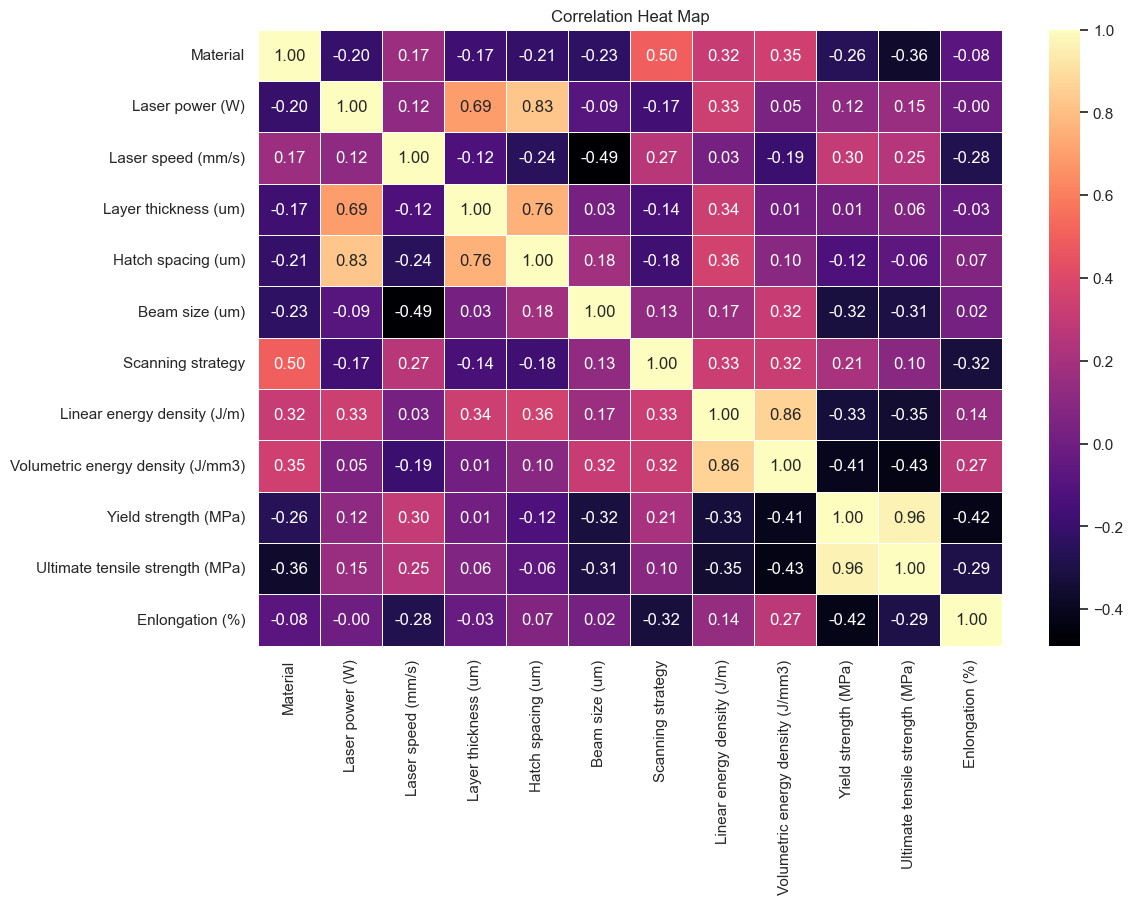

In [66]:
# Finding the correlations between features
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True,cmap="magma",fmt=".2f",linewidth=0.5)
plt.title("Correlation Heat Map")
plt.show()

In [20]:
# Creating the copy of the dataset for further usage 
data=dataset.copy()

In [21]:
features=data.iloc[:,:-3]
X=features
target_features=data.iloc[:,-3:]
y=target_features

In [23]:
X.head()

,Material,Laser power (W),Laser speed (mm/s),Layer thickness (um),Hatch spacing (um),Beam size (um),Scanning strategy,Linear energy density (J/m),Volumetric energy density (J/mm3)
0,0,250,700,50,120.0,80,0,357.142857,59.52381
1,0,250,700,50,120.0,80,0,357.142857,59.52381
2,0,250,700,50,120.0,80,0,357.142857,59.52381
3,0,250,700,50,120.0,80,0,357.142857,59.52381
4,0,950,320,100,500.0,100,0,2968.750000,59.37500


In [27]:
#Splitting the data for training and testing the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
#Printing the shape of the test and train datasets
print("Training data shape is: ", X_train.shape,y_train.shape)
print("Testing data shape is: ",X_test.shape,y_test.shape)


Training data shape is:  (179, 9) (179, 3)
Testing data shape is:  (60, 9) (60, 3)


In [35]:
# Normalize the values using standard scalar
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Model Training 

our dataset containing all are numerical features as a output. So, we will proceed model training using the regression 
based machine learning algorithms 

## Decision Tree Regression

In [45]:
#Initialization of the Decision tree regressor
dt_regressor=DecisionTreeRegressor(random_state=42)
#Training the model with training dataset
dt_regressor.fit(X_train_scaled,y_train)
#Make predictions on the Testing dataset
y_predict=dt_regressor.predict(X_test_scaled)
#Evaluation of the model performance using MSE and r2_Scored
mse_dt=mean_squared_error(y_test,y_predict)
rmse_dt=np.sqrt(mse_dt)
r2_dt=r2_score(y_test,y_predict)

print("mean_squared_error for Decision Tree Regressor is: ",mse_dt)
print("root_mean_squared_error for Decision Tree Regressor is: ",rmse_dt)
print("r2_scored_error for Decision Tree Regressor is: ",r2_dt)

mean_squared_error for Decision Tree Regressor is:  6878.64600518873
root_mean_squared_error for Decision Tree Regressor is:  82.93760308321389
r2_scored_error for Decision Tree Regressor is:  0.8563845661974576


## XG Boost Regression

In [48]:
#converting the data into DMatrix type
#dtrain=xgb.DMatrix(X_train,label=y_train)

In [58]:
input_features = data.drop(["Yield strength (MPa)", "Ultimate tensile strength (MPa)", "Enlongation (%)"], axis=1)
target_variables = data[["Yield strength (MPa)", "Ultimate tensile strength (MPa)", "Enlongation (%)"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features, target_variables, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Support Vector Machine Regression

In [59]:


# Define the SVR model
svr = SVR()

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5, 1]
}

# Create separate GridSearchCV objects for each target variable
grid_search_results = {}
for target_column in target_variables.columns:
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train[target_column])
    grid_search_results[target_column] = grid_search

# Get the best parameters and model for each target variable
best_params = {target_column: grid_search.best_params_ for target_column, grid_search in grid_search_results.items()}
best_models = {target_column: grid_search.best_estimator_ for target_column, grid_search in grid_search_results.items()}

# Make predictions on the testing set for each target variable
y_pred = pd.DataFrame({target_column: grid_search.predict(X_test_scaled) for target_column, grid_search in grid_search_results.items()})

# Evaluate the model for each target variable
mse = {target_column: mean_squared_error(y_test[target_column], y_pred[target_column]) for target_column in target_variables.columns}
r2 = {target_column: r2_score(y_test[target_column], y_pred[target_column]) for target_column in target_variables.columns}

# Print results
for target_column in target_variables.columns:
    print(f'Target: {target_column}')
    print(f'Best Hyperparameters: {best_params[target_column]}')
    print(f'Mean Squared Error: {mse[target_column]:.2f}')
    print(f'R-squared: {r2[target_column]:.2f}')
    print('\n')


Target: Yield strength (MPa)
Best Hyperparameters: {'C': 100, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}
Mean Squared Error: 27367.51
R-squared: 0.84


Target: Ultimate tensile strength (MPa)
Best Hyperparameters: {'C': 100, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}
Mean Squared Error: 20998.75
R-squared: 0.88


Target: Enlongation (%)
Best Hyperparameters: {'C': 100, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}
Mean Squared Error: 94.32
R-squared: 0.62




## K-Nearest Neighbour 

Results for Yield strength (MPa):
Mean Squared Error: 14621.74
R-squared: 0.91



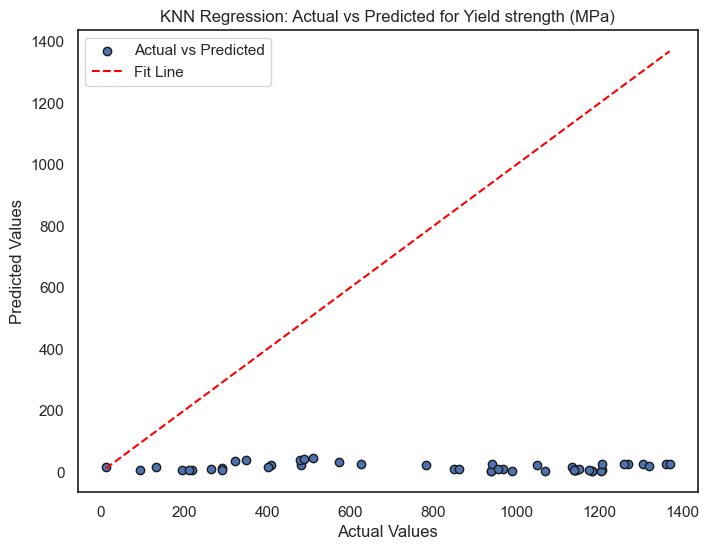

Results for Ultimate tensile strength (MPa):
Mean Squared Error: 9825.17
R-squared: 0.95



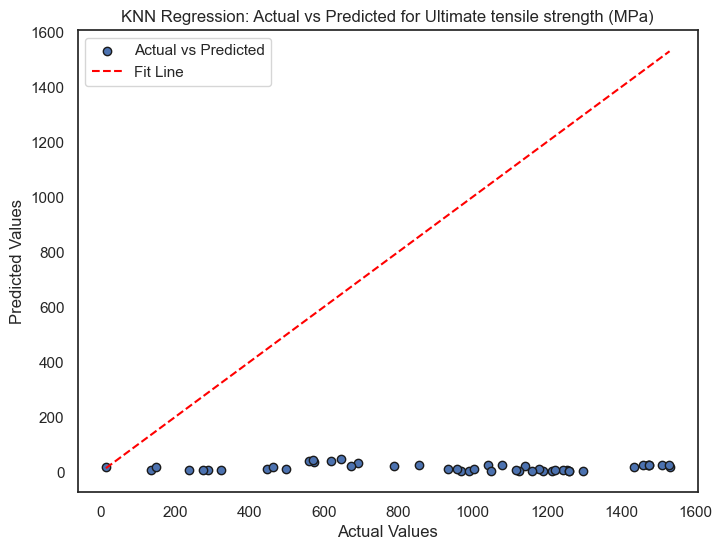

Results for Enlongation (%):
Mean Squared Error: 90.69
R-squared: 0.64



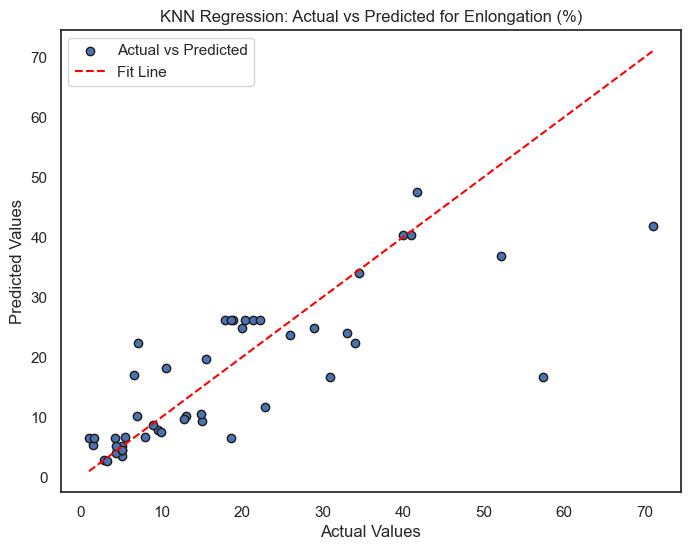

In [61]:

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)

# Initialize a dictionary to store the results for each target variable
results = {}

# Train the model and plot for each target variable
for target_column in target_variables.columns:
    # Train the model on the training set
    knn_regressor.fit(X_train_scaled, y_train[target_column])

    # Make predictions on the testing set
    y_pred = knn_regressor.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test[target_column], y_pred)
    r2 = r2_score(y_test[target_column], y_pred)
    results[target_column] = {'MSE': mse, 'R-squared': r2, 'Predictions': y_pred}

# Display results
for target_column, result in results.items():
    print(f"Results for {target_column}:")
    print(f"Mean Squared Error: {result['MSE']:.2f}")
    print(f"R-squared: {result['R-squared']:.2f}\n")

    # Plot the predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[target_column], y_pred, label='Actual vs Predicted', edgecolors='k')
    plt.plot([min(y_test[target_column]), max(y_test[target_column])], [min(y_test[target_column]), max(y_test[target_column])], linestyle='--', color='red', label='Fit Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'KNN Regression: Actual vs Predicted for {target_column}')
    plt.legend()
    plt.show()


## Random Forest Regression

Mean Squared Error: 9269.88
R-squared: 0.84


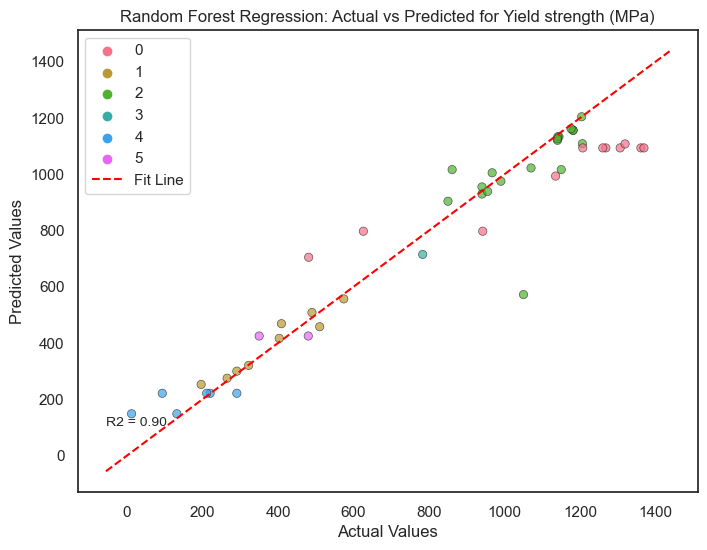

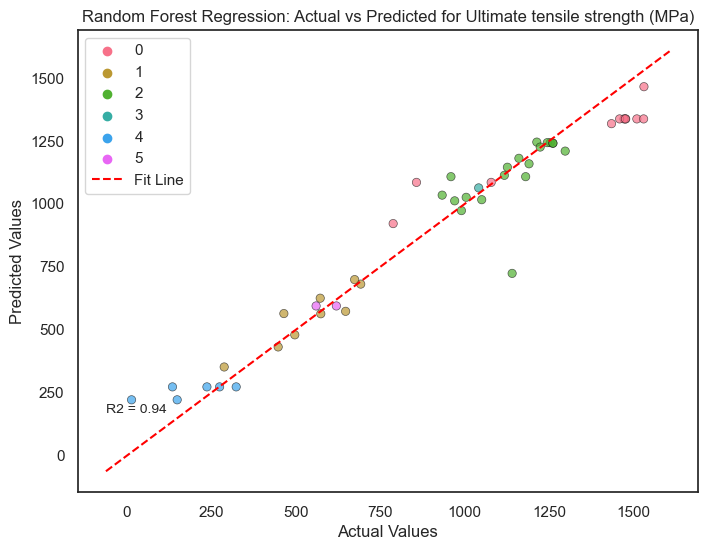

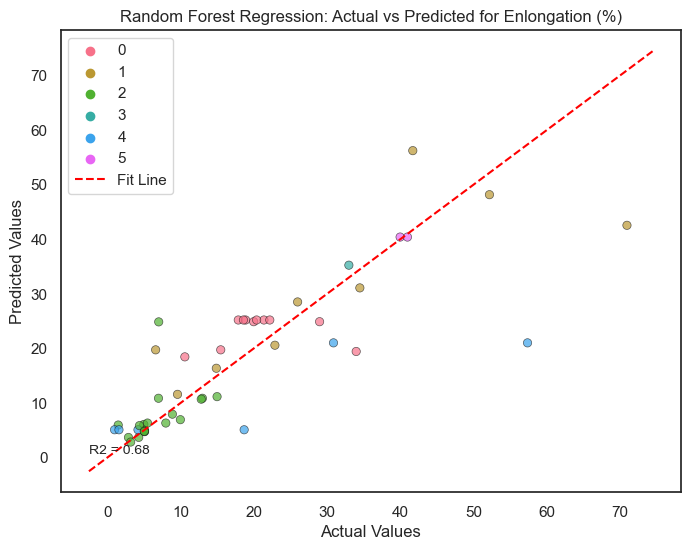

In [64]:

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training set
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Get unique values in the "Material" column
unique_materials = X_test['Material'].unique()

# Define different colors for each material category
material_colors = {material: sns.color_palette("husl", len(unique_materials))[i] for i, material in enumerate(unique_materials)}

# Set style to white (eliminate grids inside the plot)
sns.set(style="white")

# Plot the predicted vs actual values for each target variable
for target_column in target_variables.columns:
    plt.figure(figsize=(8, 6))
    
    # Use seaborn for color-coding based on 'Material'
    sns.scatterplot(x=y_test[target_column], y=y_pred[:, target_variables.columns.get_loc(target_column)], hue=X_test['Material'], palette=material_colors, edgecolor='k', alpha=0.7)

    # Display R-squared value inside the plot
    r2_text = f'R2 = {r2_score(y_test[target_column], y_pred[:, target_variables.columns.get_loc(target_column)]):.2f}'
    plt.text(plt.xlim()[0], plt.ylim()[0], r2_text, fontsize=10, verticalalignment='bottom', horizontalalignment='left')
    
    # Plot the fit line (diagonal line)
    fit_line = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
    plt.plot(fit_line, fit_line, color='red', linestyle='--', label='Fit Line')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Random Forest Regression: Actual vs Predicted for {target_column}')
    plt.legend()
    plt.show()


In [67]:
import pickle

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(rf_regressor, model_file)

print(f'Trained Random Forest model saved to {model_filename}')

Trained Random Forest model saved to random_forest_model.pkl
